In [145]:
import pandas as pd

df = pd.read_csv("./student_lifestyle_dataset.csv")
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


#### Extracurricular_Hours_Per_Day와 GPA의 상관 관계


In [147]:
#사용 안하는 열 삭제
df = df.drop(columns=['Student_ID','Study_Hours_Per_Day','Sleep_Hours_Per_Day','Social_Hours_Per_Day','Physical_Activity_Hours_Per_Day','Stress_Level'])
df.head()

,Extracurricular_Hours_Per_Day,GPA
0,3.8,2.99
1,3.5,2.75
2,3.9,2.67
3,2.1,2.88
4,0.6,3.51


In [148]:
#Extracurricular_Hours_Per_Day, GPA 기준 오름차순 정렬
df.sort_values(by=["Extracurricular_Hours_Per_Day","GPA"])

,Extracurricular_Hours_Per_Day,GPA
1448,0.0,2.70
555,0.0,2.71
1117,0.0,2.75
1705,0.0,2.75
1499,0.0,2.80
...,...,...
1168,4.0,3.36
854,4.0,3.39
1863,4.0,3.44
650,4.0,3.52


In [149]:
# 상관관계 분석
relation = df['Extracurricular_Hours_Per_Day'].corr(df['GPA'])
relation

### -0.03으로, 0에 가까워서 거의 관련이 없는 것으로 보임

-0.03217353173983064

In [150]:
# Extracurricular_Hours_Per_Day 범주형 변수로 나누기

# Low : 0 ~ 1.5시간 | Balanced : 1.5시간 ~ 3.5시간 | High : 3.5시간 이상
bins = [0, 1.5, 3.5, float('inf')]  # 구간설정
labels = ['Low', 'Balanced', 'High']  # 범주명
df['Activity_Level'] = pd.cut(df['Extracurricular_Hours_Per_Day'], bins=bins, labels=labels, right=False) #범주화
df[['Extracurricular_Hours_Per_Day', 'Activity_Level']].head(10)

,Extracurricular_Hours_Per_Day,Activity_Level
0,3.8,High
1,3.5,High
2,3.9,High
3,2.1,Balanced
4,0.6,Low
5,2.1,Balanced
6,0.7,Low
7,1.8,Balanced
8,3.6,High
9,0.7,Low


In [151]:
#범주별 GPA 평균 비교
group_means = df.groupby('Activity_Level')['GPA'].mean()
group_means

### Low의 평균값이 가장 높음

C:\Users\류예나\AppData\Local\Temp\ipykernel_14752\3203669000.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = df.groupby('Activity_Level')['GPA'].mean()


Activity_Level
Low         3.126487
Balanced    3.117242
High        3.084182
Name: GPA, dtype: float64

In [152]:
result = df.groupby('Activity_Level')['GPA'].agg(
    Median='median', #중앙값
    Mean='mean', #평균
    IQR=lambda x: x.quantile(0.75) - x.quantile(0.25) #사분위수 범위
)
result

### 중앙값 : low / 평균 : low / IQR : Balanced > 성적 차이가 큼

C:\Users\류예나\AppData\Local\Temp\ipykernel_14752\1174059847.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('Activity_Level')['GPA'].agg(


,Median,Mean,IQR
Activity_Level,,,
Low,3.12,3.126487,0.4175
Balanced,3.11,3.117242,0.4400
High,3.06,3.084182,0.4200


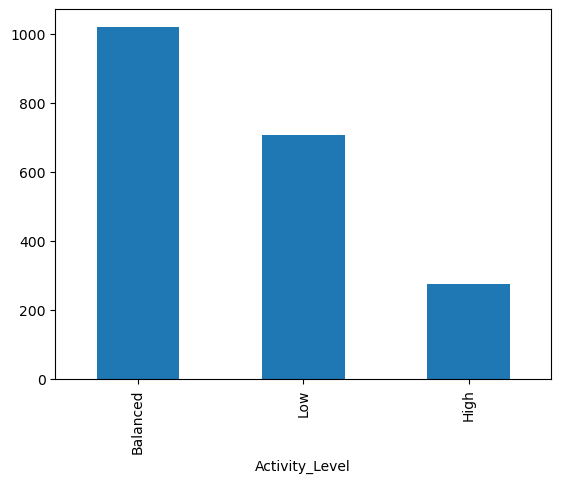

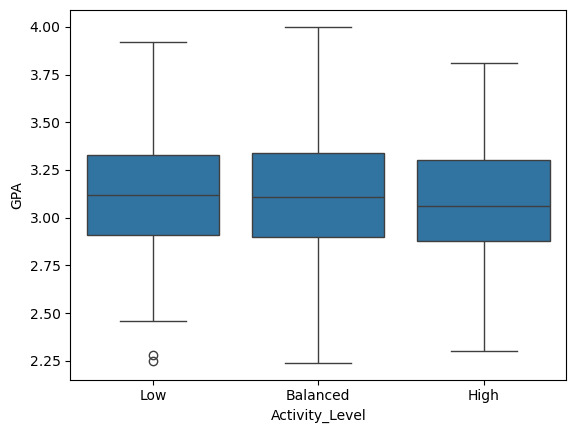

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# 각 범주의 데이터 개수 시각화
df['Activity_Level'].value_counts().plot(kind='bar')
plt.show()

# Extracurricular_Hours_Per_Day에 따른 GPA 분포
sns.boxplot(x='Activity_Level', y='GPA', data=df)
plt.show()


**Sleep_Hours_Per_Day**


In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv("./student_lifestyle_dataset.csv")
df.head()

#상관계수 계산
correlation = df['Sleep_Hours_Per_Day'].corr(df['GPA'])
correlation

###GPA와 수면시간 상관관계 X

-0.004278440948943764

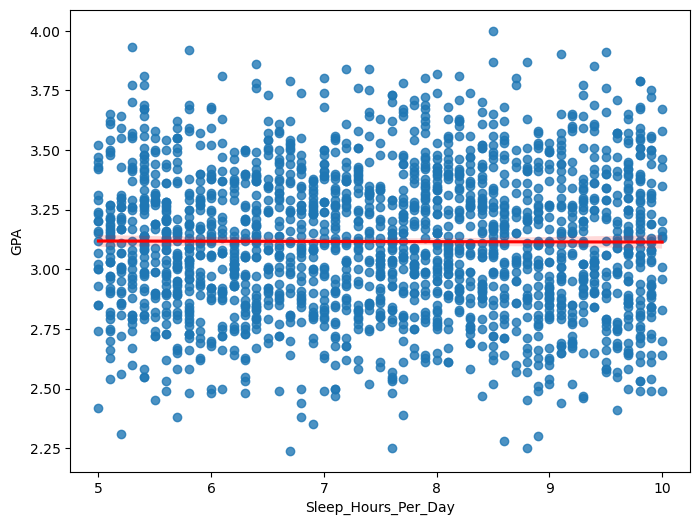

In [155]:
# 상관 관계 시각화 (산점도 및 회귀선)
plt.figure(figsize=(8, 6))
sns.regplot(
    x='Sleep_Hours_Per_Day', 
    y='GPA', 
    data=df, 
    line_kws={'color': 'red'}
)
plt.show()

###회귀선 수평해서 선형상관관계 거의없는듯

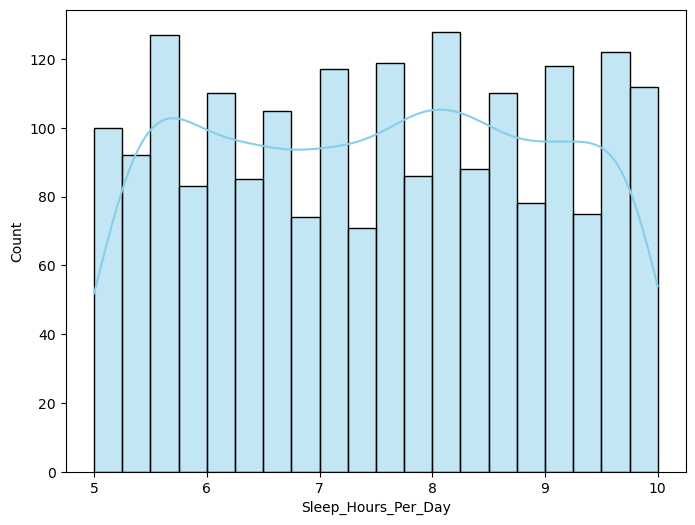

In [156]:
# Sleep_Hours_Per_Day 분포 확인
plt.figure(figsize=(8, 6))
sns.histplot(df['Sleep_Hours_Per_Day'], kde=True, bins=20, color='skyblue')
plt.show()

###수면시간 6~8시간에 집중 > 적절한 수면시간


In [157]:
#범주화화
bins = [0, 6, 9, float('inf')]
labels = ['Low', 'Balanced', 'High']
df['Sleep_Category'] = pd.cut(df['Sleep_Hours_Per_Day'], bins=bins, labels=labels, right=False)

# 그룹별 GPA 평균 계산
group_gpa = df.groupby('Sleep_Category')['GPA'].mean()
group_gpa

C:\Users\류예나\AppData\Local\Temp\ipykernel_14752\2896608417.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_gpa = df.groupby('Sleep_Category')['GPA'].mean()


Sleep_Category
Low         3.111891
Balanced    3.123757
High        3.098407
Name: GPA, dtype: float64